# Data Pipeline

ah shit, 
here we go again
{insert cj meme here}

In [1]:
from _Setup import *

 TODO : Remove Columns w/ > 90% initial missing values (maybe not since it will get rid of most variables)

In [2]:
train_data = pd.read_pickle(rawTrainFilePickle)

test_data = pd.read_pickle(rawTestFilePickle)

submission_data = pd.read_csv(rawSubmissionFile)

# Train data preparation

In [3]:
# backward fill function
def backward_fill_by_patient(df, patient_id_col='patient'):
    # Create a copy of the original DataFrame
    df_imputed = df.copy()

    df_imputed.loc[:, df_imputed.columns != patient_id_col] = (
        df_imputed.groupby(patient_id_col)
        .bfill()
    )

    # If there are patients with no entries for a column, those columns will remain unchanged
    return df_imputed

In [4]:
def forward_fill_by_patient(df, patient_id_col='patient'):
    # Create a copy of the original DataFrame
    df_imputed = df.copy()

    df_imputed.loc[:, df_imputed.columns != patient_id_col] = (
        df_imputed.groupby(patient_id_col)
        .ffill()
    )
    
    # If there are patients with no entries for a column, those columns will remain unchanged
    return df_imputed

## TODO : Remove Columns w/ > 95% initial missing values and B/F imputation

In [5]:
# Identify columns with more than 90% missing values

missing_percentage = train_data.isnull().mean() * 100

cols_to_drop = missing_percentage[missing_percentage > 95].index

# Drop the identified columns
#print(cols_to_drop)
train_truncated = train_data.drop(columns=cols_to_drop)

In [6]:
#forward imputation
train_forward = forward_fill_by_patient(train_truncated)
train_forward.head()

patient  time    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  BaseExcess  \
0    16426     1   NaN    NaN    NaN    NaN   NaN   NaN   NaN         NaN   
1    16426     2  78.0   99.5  35.25  108.5  84.5  69.0  12.0         0.0   
2    16426     3  80.0   99.0  36.20  113.0  87.0  73.0  12.0         0.0   
3    16426     4  79.0  100.0  36.50  112.0  83.0  68.0  12.0        -2.5   
4    16426     5  73.0  100.0  36.50  115.0  80.0  64.0  11.0        -2.5   

   ...   Hgb   WBC  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  ...   NaN   NaN        NaN  57.03     1.0    0.0    1.0        -4.25   
1  ...  12.0  14.2        NaN  57.03     1.0    0.0    1.0        -4.25   
2  ...  12.0  14.2        NaN  57.03     1.0    0.0    1.0        -4.25   
3  ...  12.0  14.2        NaN  57.03     1.0    0.0    1.0        -4.25   
4  ...  12.0  14.2        NaN  57.03     1.0    0.0    1.0        -4.25   

   ICULOS  SepsisLabel  
0     1.0          0.0  
1     2.0          0.0  
2     3.0          0.0  
3     4.0          0.0  
4     5.0          0.0  

[5 rows x 30 columns]

In [7]:
#backward imputation
pre_imputed_train = backward_fill_by_patient(train_forward)
pre_imputed_train.head()  

patient  time    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  BaseExcess  \
0    16426     1  78.0   99.5  35.25  108.5  84.5  69.0  12.0         0.0   
1    16426     2  78.0   99.5  35.25  108.5  84.5  69.0  12.0         0.0   
2    16426     3  80.0   99.0  36.20  113.0  87.0  73.0  12.0         0.0   
3    16426     4  79.0  100.0  36.50  112.0  83.0  68.0  12.0        -2.5   
4    16426     5  73.0  100.0  36.50  115.0  80.0  64.0  11.0        -2.5   

   ...   Hgb   WBC  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
1  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
2  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
3  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
4  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   

   ICULOS  SepsisLabel  
0     1.0          0.0  
1     2.0          0.0  
2     3.0          0.0  
3     4.0          0.0  
4     5.0          0.0  

[5 rows x 30 columns]

In [8]:
def missing_values_percentage(data, title):
    total_missing = data.isnull().sum()  
    percent_missing = (total_missing / len(data)) * 100  
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percentage': percent_missing})
    missing_data = missing_data[missing_data['Total Missing'] > 0]  
    
   
    missing_data = missing_data.sort_values(by='Percentage', ascending=False)
    
    print(f"{title} - Missing Values:\n", missing_data)


missing_values_percentage(pre_imputed_train, 'Scaled Train Data')

Scaled Train Data - Missing Values:
              Total Missing  Percentage
BaseExcess          693606   63.739010
FiO2                545205   50.101682
PaCO2               528467   48.563541
pH                  513489   47.187136
Unit1               426031   39.150172
Unit2               426031   39.150172
DBP                 181559   16.684387
Calcium             104732    9.624360
Magnesium            95155    8.744281
WBC                  44834    4.120026
Platelets            43974    4.040996
Hgb                  42004    3.859963
Hct                  40045    3.679940
Creatinine           34523    3.172495
BUN                  34066    3.130499
Potassium            32293    2.967569
Glucose              28393    2.609178
SBP                   7543    0.693165
Temp                  5067    0.465633
MAP                   2053    0.188661
Resp                  1454    0.133616
O2Sat                  328    0.030142
HR                     142    0.013049
HospAdmTime              8 

In [9]:
# Identify columns with more than 90% missing values

missing_percentage = pre_imputed_train.isnull().mean() * 100

cols_to_drop2 = missing_percentage[missing_percentage > 35].index

print(cols_to_drop2)

Index(['BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Unit1', 'Unit2'], dtype='object')


## MissForest imputation

In [10]:
pre_imputed_train.isna().sum()

patient             0
time                0
HR                142
O2Sat             328
Temp             5067
SBP              7543
MAP              2053
DBP            181559
Resp             1454
BaseExcess     693606
FiO2           545205
pH             513489
PaCO2          528467
BUN             34066
Calcium        104732
Creatinine      34523
Glucose         28393
Magnesium       95155
Potassium       32293
Hct             40045
Hgb             42004
WBC             44834
Platelets       43974
Age                 0
Gender              0
Unit1          426031
Unit2          426031
HospAdmTime         8
ICULOS              0
SepsisLabel         0
dtype: int64

In [11]:
# TODO : random sample of dataset before imputing data to save hours

sample_pool = pre_imputed_train.drop('SepsisLabel', axis = 1)

imputed_sample = pd.DataFrame(sample_pool.sample(n=10000), columns=sample_pool.columns)

imputer = MissForest()
imputer.fit(imputed_sample)

# NOTE :
This needs python 3.12 to get the .fit and .transforms funcitons on the MissForest imputer

In [12]:
imputed_data = imputer.transform(sample_pool)

imputed_data['SepsisLabel'] = pre_imputed_train['SepsisLabel']

imputed_data.isna().sum()

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [20:53<00:00, 250.61s/it]


patient        0
time           0
HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
BaseExcess     0
FiO2           0
pH             0
PaCO2          0
BUN            0
Calcium        0
Creatinine     0
Glucose        0
Magnesium      0
Potassium      0
Hct            0
Hgb            0
WBC            0
Platelets      0
Age            0
Gender         0
Unit1          0
Unit2          0
HospAdmTime    0
ICULOS         0
SepsisLabel    0
dtype: int64

In [13]:
#correlation_matrix = imputed_data.corr()

# Mask the upper triangle
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
#plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
#sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
#plt.title('Lower Triangle Correlation Matrix of Imputed Train Data')
#plt.savefig('Plots/corrmat_train_imputed.png')
#plt.show()

# TODO : Put in correlation matrix here

In [14]:
#correlation_matrix = scaled_train.corr()

# Mask the upper triangle
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
#plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
#sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
#plt.title('Lower Triangle Correlation Matrix of Imputed and Scaled Train Data')
#plt.savefig('Plots/corrmat_train_imputed.png')
#plt.show()

## TODO : SMOTE

In [15]:
X = imputed_data.drop(columns = ['SepsisLabel'])
y = imputed_data['SepsisLabel']


sm = SMOTE(sampling_strategy=0.2, k_neighbors=5, random_state=8)
X_train_syn, y_train_syn = sm.fit_resample(X, y)

print(imputed_data.iloc[:, 0:4].describe())
print(X_train_syn.iloc[:, 0:4].describe())

            patient          time            HR         O2Sat
count  1.088197e+06  1.088197e+06  1.088197e+06  1.088197e+06
mean   1.410742e+04  2.668297e+01  8.438115e+01  9.715170e+01
std    8.151722e+03  2.955474e+01  1.742592e+01  3.140354e+00
min    1.000000e+00  1.000000e+00  2.000000e+01  2.000000e+01
25%    7.043000e+03  1.000000e+01  7.200000e+01  9.600000e+01
50%    1.410100e+04  2.000000e+01  8.300000e+01  9.800000e+01
75%    2.118100e+04  3.400000e+01  9.500000e+01  9.900000e+01
max    2.823500e+04  4.250000e+02  2.110000e+02  1.001495e+02
            patient          time            HR         O2Sat
count  1.282290e+06  1.282290e+06  1.282290e+06  1.282290e+06
mean   1.412599e+04  3.102478e+01  8.533943e+01  9.712615e+01
std    8.157907e+03  3.746143e+01  1.779990e+01  3.167227e+00
min    1.000000e+00  1.000000e+00  2.000000e+01  2.000000e+01
25%    7.045000e+03  1.000000e+01  7.276883e+01  9.600000e+01
50%    1.414700e+04  2.100000e+01  8.400000e+01  9.800000e+01
75%    2

In [16]:
resampled_train = pd.concat([X_train_syn, y_train_syn], axis = 1)
resampled_train.head()

patient  time    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  BaseExcess  \
0    16426     1  78.0   99.5  35.25  108.5  84.5  69.0  12.0         0.0   
1    16426     2  78.0   99.5  35.25  108.5  84.5  69.0  12.0         0.0   
2    16426     3  80.0   99.0  36.20  113.0  87.0  73.0  12.0         0.0   
3    16426     4  79.0  100.0  36.50  112.0  83.0  68.0  12.0        -2.5   
4    16426     5  73.0  100.0  36.50  115.0  80.0  64.0  11.0        -2.5   

   ...   Hgb   WBC  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
1  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
2  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
3  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   
4  ...  12.0  14.2      162.0  57.03     1.0    0.0    1.0        -4.25   

   ICULOS  SepsisLabel  
0     1.0          0.0  
1     2.0          0.0  
2     3.0          0.0  
3     4.0          0.0  
4     5.0          0.0  

[5 rows x 30 columns]

In [17]:
# Before smote distribution 
sepsis_inf = train_data['SepsisLabel'].value_counts()
sepsis_percentages = (sepsis_inf / sepsis_inf.sum()) * 100
print(sepsis_percentages)

SepsisLabel
0.0    98.196924
1.0     1.803076
Name: count, dtype: float64


In [18]:
# After smote distribution
sepsis_inf2 = resampled_train['SepsisLabel'].value_counts()
sepsis_percentages2 = (sepsis_inf2 / sepsis_inf2.sum()) * 100
print(sepsis_percentages2)

SepsisLabel
0.0    83.333333
1.0    16.666667
Name: count, dtype: float64


## Scaling 

In [19]:
exclude_cols = ['patient', 'time', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']

# Separate columns into those to scale and those to exclude
cols_to_scale = resampled_train.drop(columns=exclude_cols + ['SepsisLabel']).columns
scaled_data = resampled_train[cols_to_scale]

# Scale the selected columns
scaler = StandardScaler()
scaled_scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns=cols_to_scale)

# Combine scaled data with excluded columns and the target variable
scaled_train = pd.concat([scaled_scaled_data, resampled_train[exclude_cols], resampled_train['SepsisLabel']], axis=1)

# Display the resulting DataFrame
scaled_train.head()

HR     O2Sat      Temp       SBP       MAP       DBP      Resp  \
0 -0.412330  0.749504 -2.144017 -0.630028  0.134485  0.408390 -1.289812   
1 -0.412330  0.749504 -2.144017 -0.630028  0.134485  0.408390 -1.289812   
2 -0.299970  0.591638 -0.909115 -0.437045  0.287724  0.703318 -1.289812   
3 -0.356150  0.907371 -0.519146 -0.479930  0.042542  0.334658 -1.289812   
4 -0.693231  0.907371 -0.519146 -0.351275 -0.141345  0.039731 -1.477035   

   BaseExcess      FiO2        pH  ...  Platelets       Age  patient  time  \
0    0.047893  0.070122  0.353536  ...  -0.435514 -0.299385    16426     1   
1    0.047893  0.070122  0.353536  ...  -0.435514 -0.299385    16426     2   
2    0.047893 -0.000226  0.731823  ...  -0.435514 -0.299385    16426     3   
3   -0.783638 -0.000226 -0.024750  ...  -0.435514 -0.299385    16426     4   
4   -0.783638 -0.014296 -0.024750  ...  -0.435514 -0.299385    16426     5   

   Gender  Unit1  Unit2  HospAdmTime  ICULOS  SepsisLabel  
0     1.0    0.0    1.0        -4.25     1.0          0.0  
1     1.0    0.0    1.0        -4.25     2.0          0.0  
2     1.0    0.0    1.0        -4.25     3.0          0.0  
3     1.0    0.0    1.0        -4.25     4.0          0.0  
4     1.0    0.0    1.0        -4.25     5.0          0.0  

[5 rows x 30 columns]

In [20]:
#exclude_cols = ['patient', 'time', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel']

# Separate columns into those to scale and those to exclude
#cols_to_scale = resampled_train.drop(columns=exclude_cols).columns

# Scale the selected columns
#scaler = StandardScaler()
#scaled_data = pd.DataFrame(scaler.fit_transform(resampled_train[cols_to_scale]), columns=cols_to_scale)

# Combine scaled data with excluded columns
#scaled_train = pd.concat([scaled_data, resampled_train[exclude_cols].reset_index(drop=True)], axis=1)

# Display the resulting DataFrame
#print(scaled_train.head())


## Correlation Matrixes for train data set pipeline

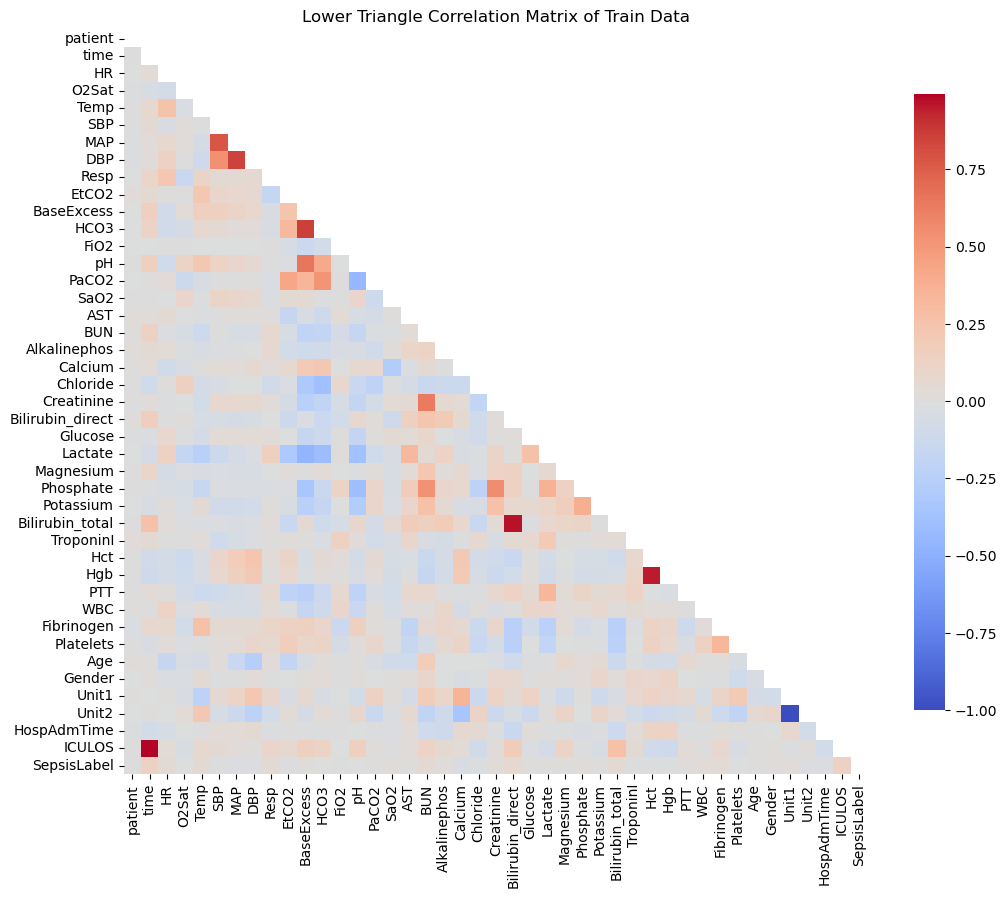

In [21]:
correlation_matrix = train_data.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
plt.title('Lower Triangle Correlation Matrix of Train Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()

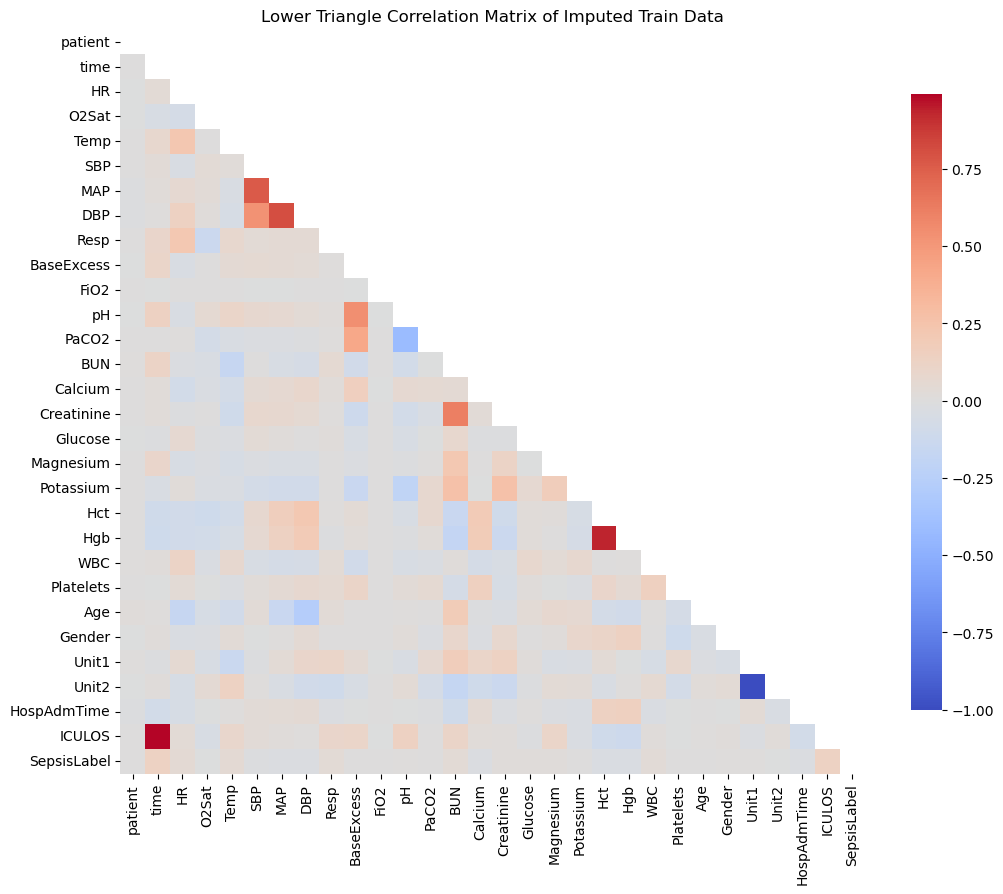

In [22]:
correlation_matrix = imputed_data.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
plt.title('Lower Triangle Correlation Matrix of Imputed Train Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()

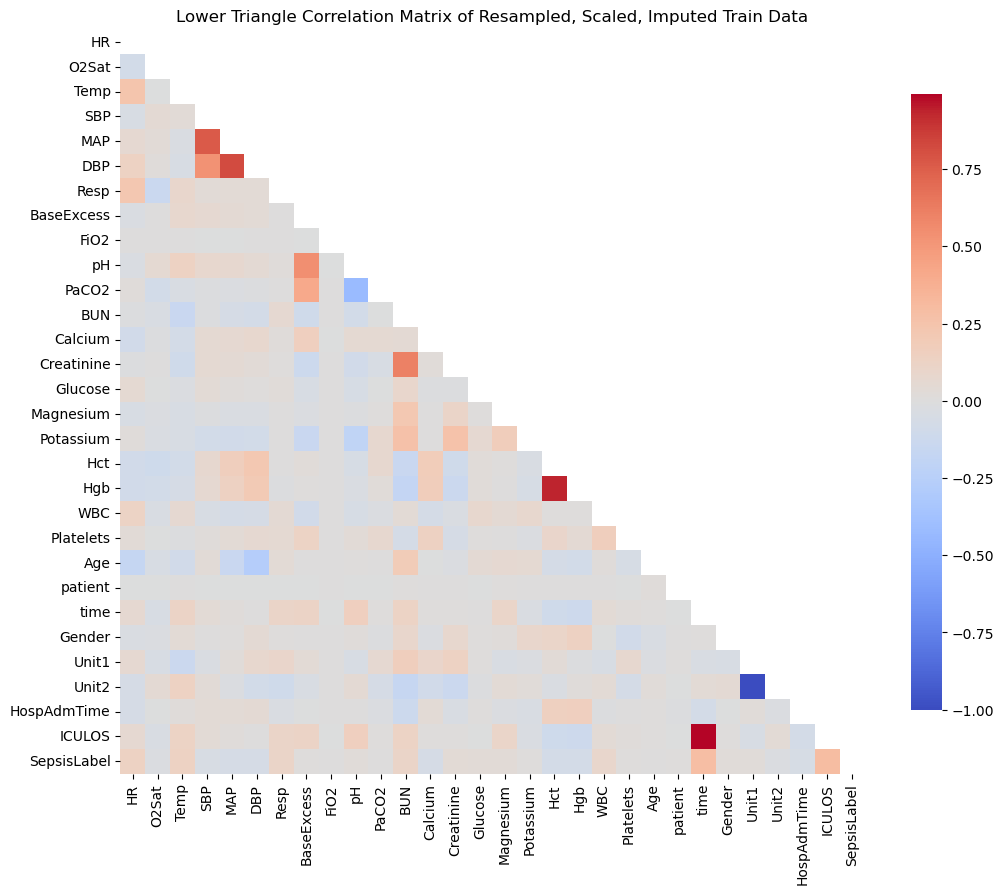

In [23]:
correlation_matrix = scaled_train.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
plt.title('Lower Triangle Correlation Matrix of Resampled, Scaled, Imputed Train Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()

## Distributions for train data set pipeline

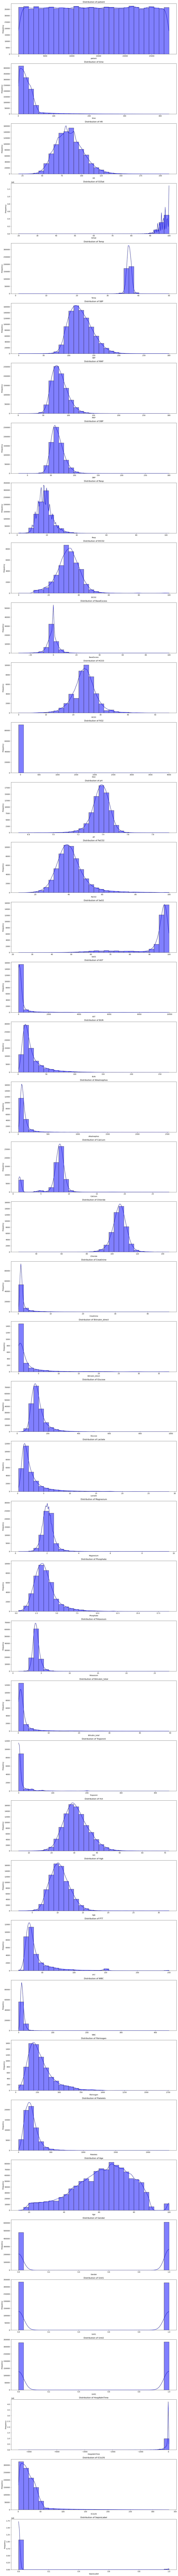

In [24]:
def plot_all_variable_distributions(df):
    """
    Plots the distribution of all numerical variables in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    
    num_vars = len(num_cols)
    plt.figure(figsize=(15, 5 * num_vars))
    
    for i, col in enumerate(num_cols):
        plt.subplot(num_vars, 1, i + 1)  
        sns.histplot(df[col], kde=True, bins=30, color='blue')  
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
    plt.tight_layout()  
    plt.show()


plot_all_variable_distributions(train_data)

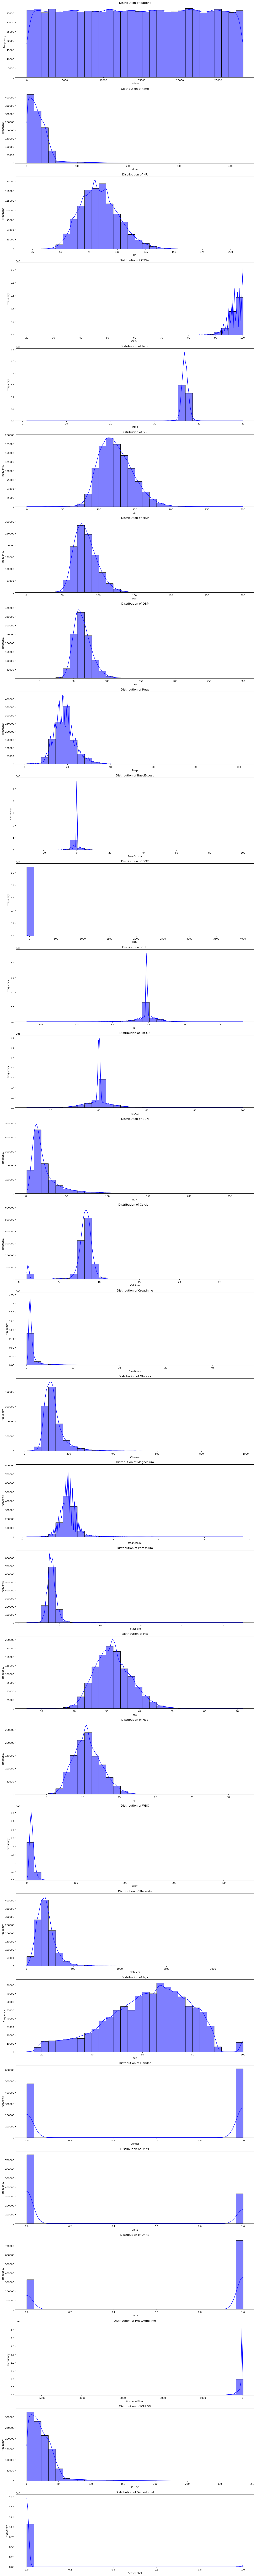

In [25]:
plot_all_variable_distributions(imputed_data)

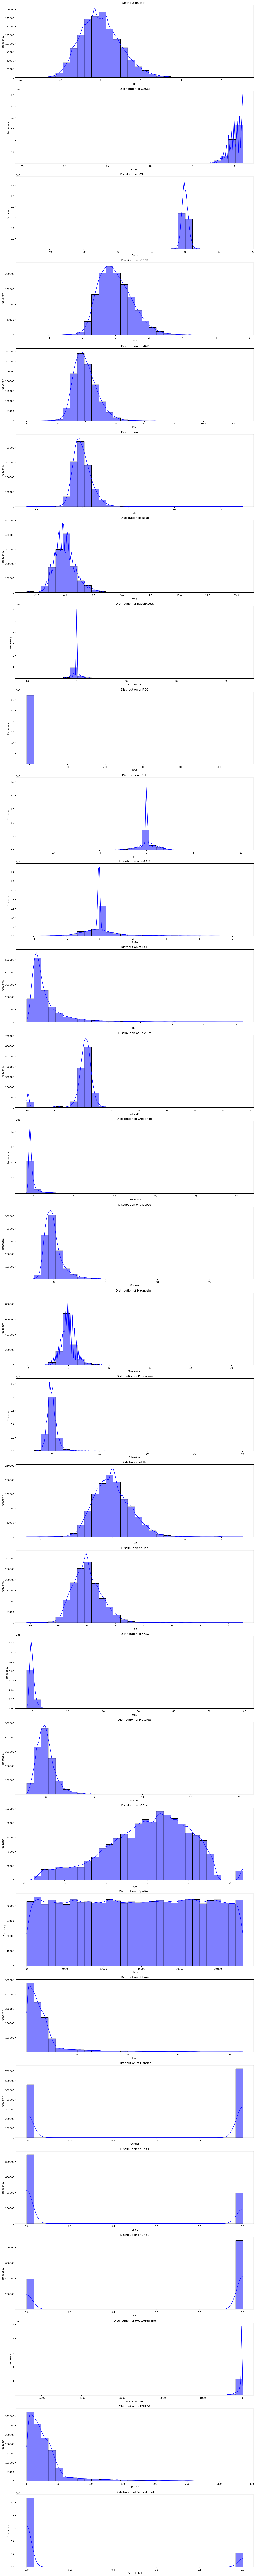

In [26]:
plot_all_variable_distributions(scaled_train)

## Final train data set to csv

In [29]:
# get rid of the index
#scaled_train.to_csv(missForestTrainFile)
resampled_train.to_csv('ttrain.csv', index=False)

# TEST PIPELINE

## Imputing B/F and missforest

In [ ]:
test_dropped = test_data.drop(cols_to_drop, axis = 1)
test_dropped.head()

In [ ]:
test_dropped = test_data.drop(cols_to_drop2, axis = 1)
test_dropped.head()

In [ ]:
#forward imputation
test_forward = forward_fill_by_patient(test_dropped)
test_forward.head()

In [ ]:
#forward imputation
pre_imputed_test = backward_fill_by_patient(test_forward)
pre_imputed_test.head()

## TODO : Find number of missing here

In [ ]:
# forward fill 
pre_imputed_test['HR'] = pd.to_numeric(pre_imputed_test['HR'], errors='coerce')

# TODO : ERROR - SEPSIS LABEL IN FIRST SCALER, TAKE IT OUT

pre_imputed_test2 = imputer.transform(pre_imputed_test)

In [ ]:
pre_imputed_test2.isna().sum()

## Scaling

In [ ]:
pre_imputed_test2.head()

In [ ]:
# SCALING WHILE OMITING SOME VARIABLES FIXED# 

#indices_test2 = pre_imputed_test2.isna()

# Create Simple Imputer to fill NaN values with the mean for test data
#imputer = SimpleImputer(strategy='mean') 
#imputed_test = pd.DataFrame(imputer.transform(pre_imputed_test2), columns=pre_imputed_test2.columns)

# Separate columns into those to scale and those to exclude (no target variable in test)
#cols_to_scale_test = imputed_test.drop(columns=exclude_cols).columns

# Scale the selected columns using the already-fitted scaler
#scaled_test_data = pd.DataFrame(scaler.transform(imputed_test[cols_to_scale_test]), columns=cols_to_scale_test)

# Combine scaled data with excluded columns
#scaled_test = pd.concat([scaled_test_data, imputed_test[exclude_cols]], axis=1)

In [ ]:
# Exclude columns as specified
#exclude_cols = ['patient', 'time', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']

# Separate columns to scale in the training data
cols_to_scale = resampled_train.drop(columns=exclude_cols + ['SepsisLabel']).columns

# Fit the scaler on the training data
#scaler = StandardScaler()
#scaler.fit(resampled_train[cols_to_scale])

# For the test data, drop excluded columns safely
#test_data = pre_imputed_test2.drop(columns=exclude_cols, errors='ignore')

# Scale the columns that were used in the training data
cols_to_scale_test = test_data.columns.intersection(cols_to_scale)

# Scale the selected columns
#scaled_test_data = pd.DataFrame(scaler.transform(test_data[cols_to_scale_test]), columns=cols_to_scale_test)

# Check which exclude columns are actually in test_data
#existing_exclude_cols = [col for col in exclude_cols if col in pre_imputed_test2.columns]

# Combine the scaled data with the existing excluded columns
#scaled_test = pd.concat([scaled_test_data, pre_imputed_test2[existing_exclude_cols].reset_index(drop=True)], axis=1)

# Display the resulting DataFrame
#scaled_test.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(resampled_train[cols_to_scale])  

# Scale the test data using the fitted scaler
scaled_test = pd.DataFrame(scaler.transform(pre_imputed_test2[cols_to_scale_test]), columns=cols_to_scale_test)
scaled_test = pd.concat([scaled_test, pre_imputed_test2[exclude_cols]], axis=1)

# Check if the scaling is consistent
scaled_test.head()

## Correlation matrixes for test data set pipeline

In [ ]:
test_dropped['HR'] = pd.to_numeric(test_dropped['HR'], errors='coerce')
correlation_matrix = test_dropped.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8})

# Set the title
plt.title('Lower Triangle Correlation Matrix of Test Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()

In [ ]:
correlation_matrix = scaled_test.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8}, vmin = -1, vmax = 1)

# Set the title
plt.title('Lower Triangle Correlation Matrix of Scaled, Imputed Test Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()

## Distributions for test data pipeline

In [ ]:
plot_all_variable_distributions(test_data)

In [ ]:
plot_all_variable_distributions(scaled_test)

## Final test data set to csv 

In [ ]:
#get rid of the index
#scaled_test.to_csv(os.path.join(imputedDataPath, "missforest_imputed_test.csv"))
pre_imputed_test2.to_csv('ttest.csv', index=False)